# IMPORTANDO BIBLIOTECAS

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# CARREGANDO ARQUIVOS

In [21]:
df = pd.read_csv('data/log.csv')
df.head()

,filename,data,municipio,estado,remedio,texto,cnpj
0,34c244786f1b1e03e403c53c62ad0053c3c9760c.txt,2020-06-22T13:03:53Z,Salvador,Bahia,ivermectina,JOSÉ EGÍDIO DE SANTANAPRESIDENTE/COPELDISPENSA...,04.162.170/0001-23
1,260e14014a291f89ddb138945ce0fc4a90c6eb12.txt,2020-10-21T22:46:01Z,Teresina,Piauí,ivermectina,RA-TIFICO O ENTENDIMENTO EXPOSTO NO PARECER RE...,08.306.438/0001-04
2,dfb37f9fcf2e1ffca6a6e49dc8a7a6ef0fafca1a.txt,2020-12-10T00:04:06Z,Manaus,Amazonas,ivermectina,"DISPENSO O PROCEDIMENTO LICITATÓRIO, COM BASE ...",NaN
3,48754976b557ced1b37a97cd871741a8d5660b8b.txt,2020-11-05T19:55:59Z,Cuiaba,Mato Grosso,ivermectina,IRANIZO MATOS RODRIGUESPREGOEIROPORTARIA Nº 13...,84.551.191/0001-70
4,d658afdb9eeec69b0c258f9e61175b2133dd72e6.txt,2020-11-05T19:40:20Z,Cuiaba,Mato Grosso,ivermectina,"ANKE HELGA SCHWABE, NO USO DE SUAS ATRIBUIÇÕES...",NaN


In [22]:
# Excluindo o muncípio de Cuiabá, pois foi constatado que na verdade
# o diário oficial de cuiabá engloba vários municípios do mato grosso
# o que tornaria injusto levantar estatísticas sobre esse município

df = df[df['municipio'] != 'Cuiaba'].reset_index(drop=True)
df.head()

,filename,data,municipio,estado,remedio,texto,cnpj
0,34c244786f1b1e03e403c53c62ad0053c3c9760c.txt,2020-06-22T13:03:53Z,Salvador,Bahia,ivermectina,JOSÉ EGÍDIO DE SANTANAPRESIDENTE/COPELDISPENSA...,04.162.170/0001-23
1,260e14014a291f89ddb138945ce0fc4a90c6eb12.txt,2020-10-21T22:46:01Z,Teresina,Piauí,ivermectina,RA-TIFICO O ENTENDIMENTO EXPOSTO NO PARECER RE...,08.306.438/0001-04
2,dfb37f9fcf2e1ffca6a6e49dc8a7a6ef0fafca1a.txt,2020-12-10T00:04:06Z,Manaus,Amazonas,ivermectina,"DISPENSO O PROCEDIMENTO LICITATÓRIO, COM BASE ...",NaN
3,d06f4585a02f021aae724fd0c424acc9ca3008eb.txt,2020-05-15T04:17:26Z,São Paulo,São Paulo,ivermectina,"5 ML 600 8,50 5.100,001492/2020 CRISTALIA PROD...",NaN
4,dcf43df5786baf0cf8be00fb38c23a9a018c5ce0.txt,2020-06-09T04:37:40Z,São Paulo,São Paulo,ivermectina,"5 ML 600 8,50 5.100,001492/2020 CRISTALIA PROD...",NaN


# ANÁLISE EXPLORATÓRIA DE DADOS

## Quantas vezes cada medicamente não eficaz aparece em diários oficiais?


In [12]:
df['remedio'].value_counts()

cloroquina           29
hidroxicloroquina    22
ivermectina           8
azitromicina          1
Name: remedio, dtype: int64

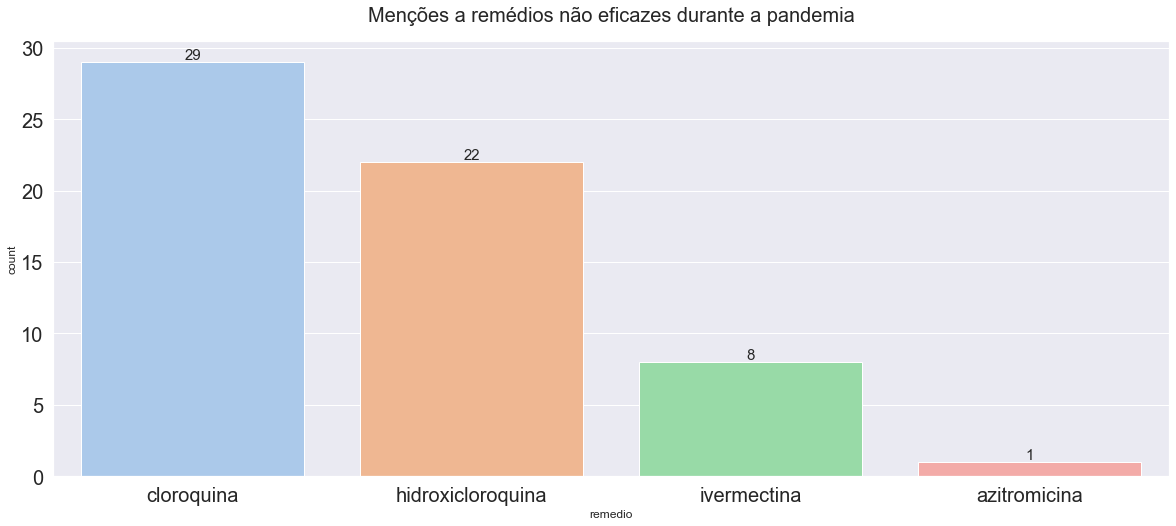

In [30]:
sns.set_theme(style = 'whitegrid')
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(x = 'remedio', data = df, palette = 'pastel', order=df['remedio'].value_counts().index.to_list())
ax.set_title('Menções a remédios não eficazes durante a pandemia', fontsize=20, pad=20)
ax.bar_label(ax.containers[0], fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=20)

plt.savefig('img/remedios.png')

plt.show()


## Quantas vezes cada município citou um remédio não eficaz?

In [14]:
df['municipio'].value_counts()

Florianópolis     31
São Paulo         11
Natal              5
Belém              4
Salvador           3
Rio de Janeiro     2
Brasília           2
Teresina           1
Manaus             1
Name: municipio, dtype: int64

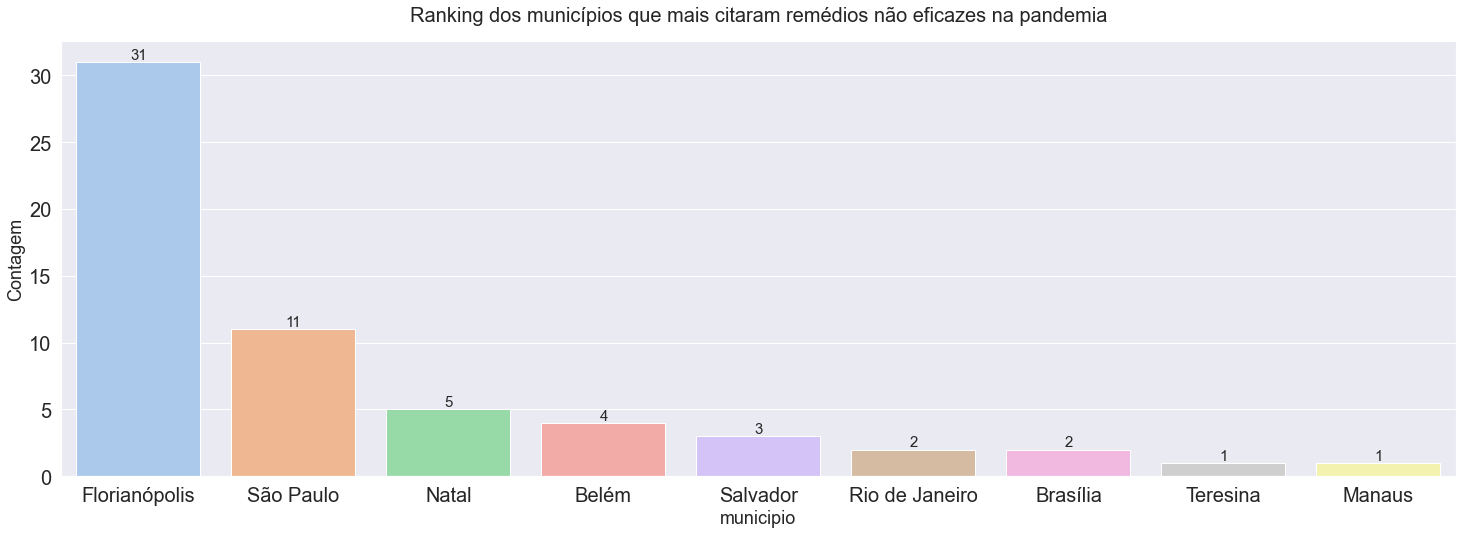

In [31]:
sns.set_theme(style = 'whitegrid')
sns.set(rc={'figure.figsize':(25,8)}, font_scale=1.5)
ax = sns.countplot(x = 'municipio', data = df, palette = 'pastel', order=df['municipio'].value_counts().index.to_list())
ax.set_title('Ranking dos municípios que mais citaram remédios não eficazes na pandemia', fontsize=20, pad=20)
ax.set_ylabel('Contagem')
ax.bar_label(ax.containers[0], fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=20)


plt.savefig('img/municipios.png')

plt.show()

## Quais empresas mais aparecem?

In [16]:
df['cnpj'].value_counts()

04.162.170/0001-23    1
08.306.438/0001-04    1
05.207.715/0001-33    1
05 207 715 0001 33    1
Name: cnpj, dtype: int64

In [25]:
df['cnpj'] = df['cnpj'].str.replace("05 207 715 0001 33", "05.207.715/0001-33")
df['cnpj'].value_counts()

05.207.715/0001-33    2
04.162.170/0001-23    1
08.306.438/0001-04    1
Name: cnpj, dtype: int64

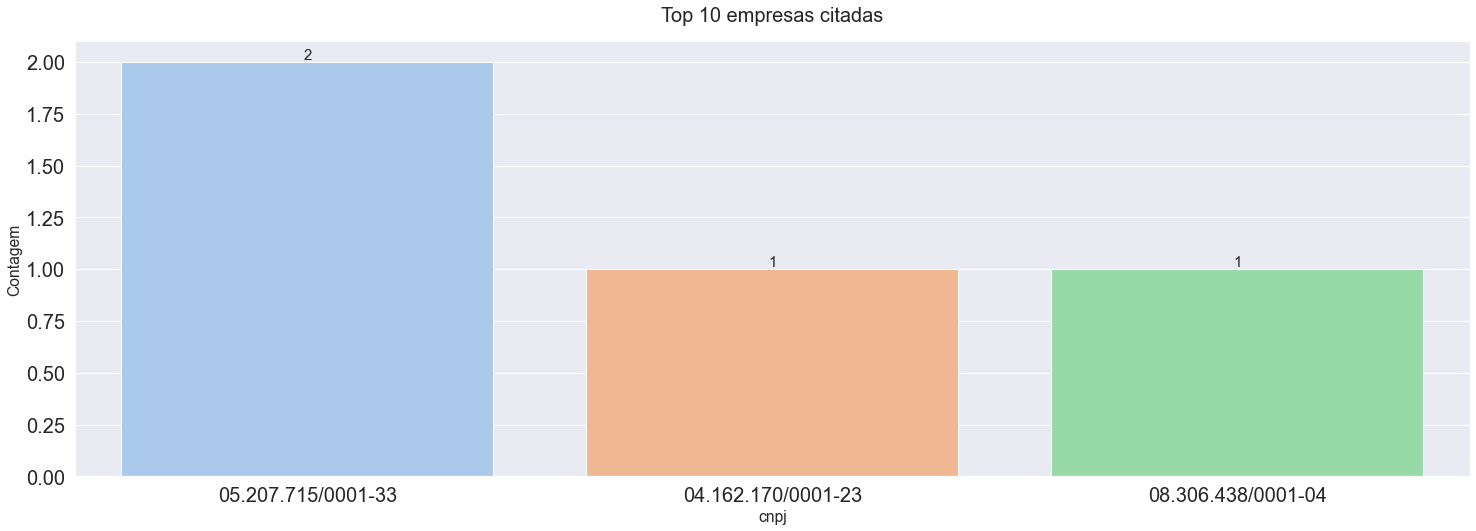

In [32]:
sns.set_theme(style = 'whitegrid')
sns.set(rc={'figure.figsize':(25,8)}, font_scale=1.3)
ax = sns.countplot(x = 'cnpj', data = df, palette = 'pastel', order=df['cnpj'].value_counts().iloc[:10].index)
ax.set_title('Top 10 empresas citadas', fontsize=20, pad=20)
ax.set_ylabel('Contagem')
ax.bar_label(ax.containers[0], fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=20)


plt.savefig('img/topempresas.png')

plt.show()